# Matplotlib Practice

This notebook offers a set of exercises to different tasks with Matplotlib.

It should be noted there may be more than one different way to answer a question or complete an exercise.

Different tasks will be detailed by comments or text.

For further reference and resources, it's advised to check out the [Matplotlib documentation](https://matplotlib.org/3.1.1/contents.html).

If you're stuck, don't forget, you can always search for a function, for example if you want to create a plot with `plt.subplots()`, search for [`plt.subplots()`](https://www.google.com/search?q=plt.subplots()).

In [2]:
# Import the pyplot module from matplotlib as plt and make sure  
# plots appear in the notebook using '%matplotlib inline'
import matplotlib.pyplot as plt
import numpy as np


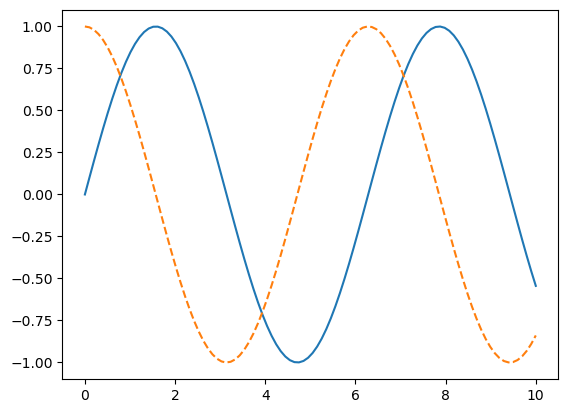

In [3]:
# Create a simple plot using plt.plot()
%matplotlib inline


x1 = np.linspace(0, 10, 100)


# create a plot figure
fig = plt.figure()

plt.plot(x1, np.sin(x1), '-')
plt.plot(x1, np.cos(x1), '--');

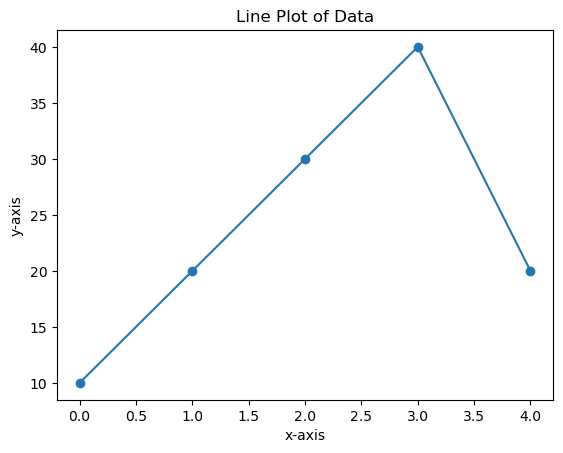

In [4]:
# Plot a single Python list

data = [10, 20, 30, 40, 20]
plt.plot(data, marker='o') 
plt.title('Line Plot of Data')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

In [5]:
# Create two lists, one called X, one called y, each with 5 numbers in them
x = [10,20,7,9,30]
y = [6,8,9,30,50]

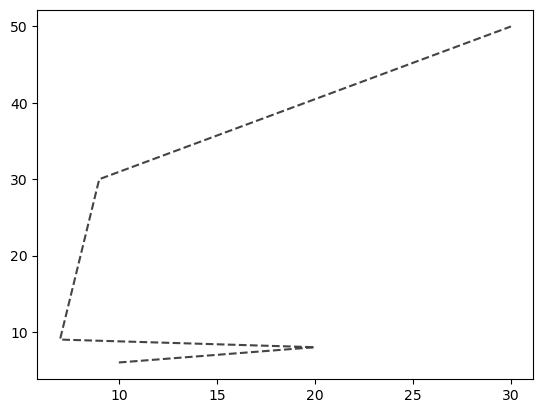

In [6]:
# Plot X & y (the lists you've created)
plt.plot(x,y,color = '#444444' ,linestyle='--')
plt.show()

There's another way to create plots with Matplotlib, it's known as the object-orientated (OO) method. Let's try it.

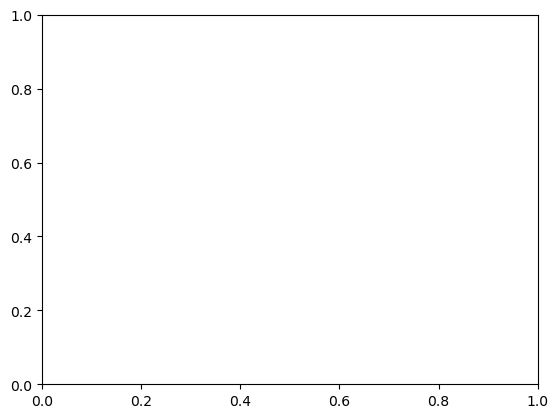

In [8]:
# Create a plot using plt.subplots()
fig,ax = plt.subplots()

In [9]:
# Create a plot using plt.subplots() and then add X & y on the axes
ax.plot(x,y,color = '#444444' ,linestyle='--')
plt.show()

Now let's try a small matplotlib workflow.

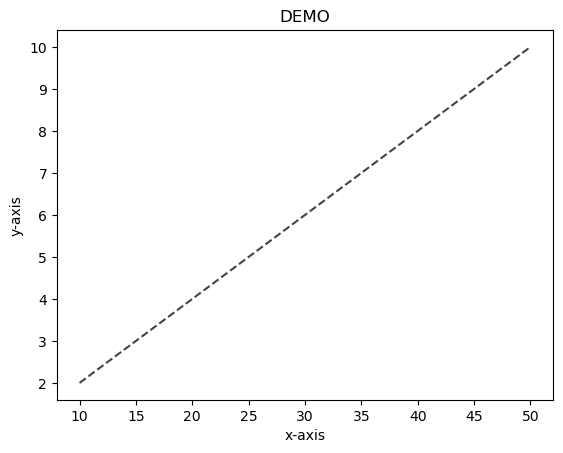

In [11]:
# Import and get matplotlib ready
import matplotlib.pyplot as plt
# Prepare data (create two lists of 5 numbers, X & y)
x = [10,20,30,40,50]
y = [2,4,6,8,10]

# Setup figure and axes using plt.subplots()
fig1,ax1 = plt.subplots()

# Add data (X, y) to axes
ax1.plot(x,y,color = '#444444' ,linestyle='--')

# Customize plot by adding a title, xlabel and ylabel
ax1.set_title('DEMO')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')

# Save the plot to file using fig.savefig()
fig1.savefig('fig1.png')

How about we try another type of plot? This time let's look at a bar plot. First we'll make some data.

In [13]:
# Create a Python dictionary of 3 of your favourite foods with 
# The keys of the dictionary should be the food name and the values their price
my_food = {
    "pizza": 200,
    "crepe": 100,
    "shawarmma": 80
}


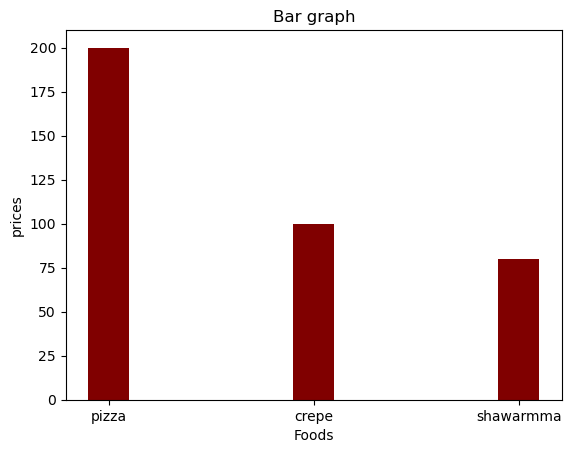

In [14]:
# Create a bar graph where the x-axis is the keys of the dictionary
# and the y-axis is the values of the dictionary
x = list(my_food.keys())
y = list(my_food.values())
plt.bar(x, y, color ='maroon', 
        width = 0.2)

# Add a title, xlabel and ylabel to the plot
plt.xlabel("Foods")
plt.ylabel("prices")
plt.title("Bar graph")
plt.show()


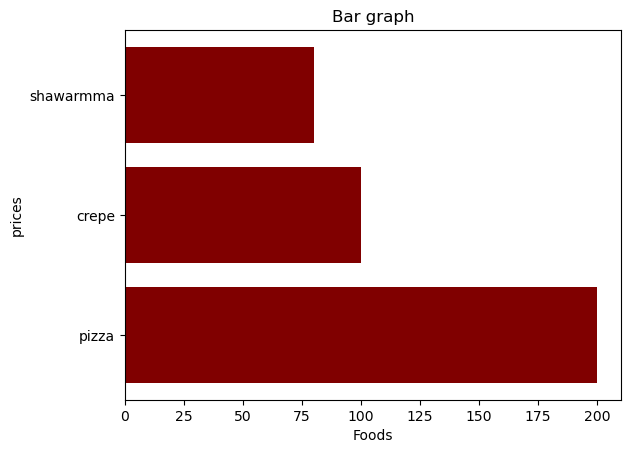

In [15]:
# Make the same plot as above, except this time make the bars go horizontal
plt.barh(x, y, color ='maroon')
plt.xlabel("Foods")
plt.ylabel("prices")
plt.title("Bar graph")
plt.show()

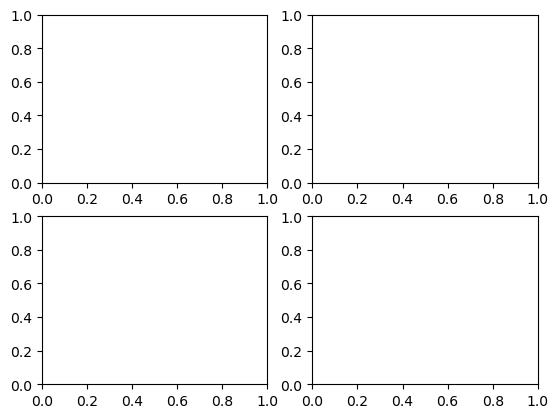

In [16]:
# Create an empty subplot with 2 rows and 2 columns (4 subplots total)
fig,ax1 = plt.subplots(nrows = 2 , ncols = 2 )

Now we've seen how to plot with Matplotlib and data directly. Let's practice using Matplotlib to plot with pandas.

First we'll need to import pandas and create a DataFrame work with.

In [18]:
# Import pandas as pd
import numpy as np
import pandas as pd


In [19]:
# Import the '../data/car-sales.csv' into a DataFame called car_sales and view
car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


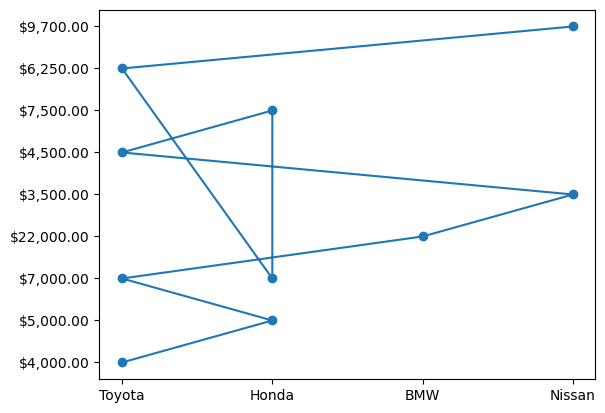

In [20]:
# Try to plot the 'Price' column using the plot() function
make = car_sales['Make'] 
price = car_sales['Price']
plt.plot(make,price,marker = 'o')

Why doesn't it work?

Hint: It's not numeric data.

In the process of turning it to numeric data, let's create another column which adds the total amount of sales and another one which shows what date the car was sold.

Hint: To add a column up cumulatively, look up the cumsum() function. And to create a column of dates, look up the date_range() function.

In [22]:
# Remove the symbols, the final two numbers from the 'Price' column and convert it to numbers
car_sales['Price'] = car_sales['Price'].replace({'\$': '', ',': ''}, regex=True)

car_sales['Price'] = car_sales['Price'].str[:-3]

car_sales['Price'] = pd.to_numeric(car_sales['Price'], errors='coerce')
car_sales

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\OT\AppData\Local\Temp\ipykernel_22816\1923573907.py:2: SyntaxWarning: invalid escape sequence '\$'
  car_sales['Price'] = car_sales['Price'].replace({'\$': '', ',': ''}, regex=True)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [23]:
# Add a column called 'Total Sales' to car_sales which cumulatively adds the 'Price' column
from datetime import datetime, timedelta
car_sales['Total Sales'] = car_sales['Price'].cumsum()

# Add a column called 'Sale Date' which lists a series of successive dates starting from today (your today)
today = datetime.today()
num_rows = len(car_sales)
date_range = [today + timedelta(days=i) for i in range(num_rows)]
formatted_dates = [date.strftime('%Y-%m-%d') for date in date_range]
car_sales['Sale Date'] = formatted_dates
# View the car_sales DataFrame
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000,4000,2024-09-09
1,Honda,Red,87899,4,5000,9000,2024-09-10
2,Toyota,Blue,32549,3,7000,16000,2024-09-11
3,BMW,Black,11179,5,22000,38000,2024-09-12
4,Nissan,White,213095,4,3500,41500,2024-09-13
5,Toyota,Green,99213,4,4500,46000,2024-09-14
6,Honda,Blue,45698,4,7500,53500,2024-09-15
7,Honda,Blue,54738,4,7000,60500,2024-09-16
8,Toyota,White,60000,4,6250,66750,2024-09-17
9,Nissan,White,31600,4,9700,76450,2024-09-18


Now we've got a numeric column (`Total Sales`) and a dates column (`Sale Date`), let's visualize them.

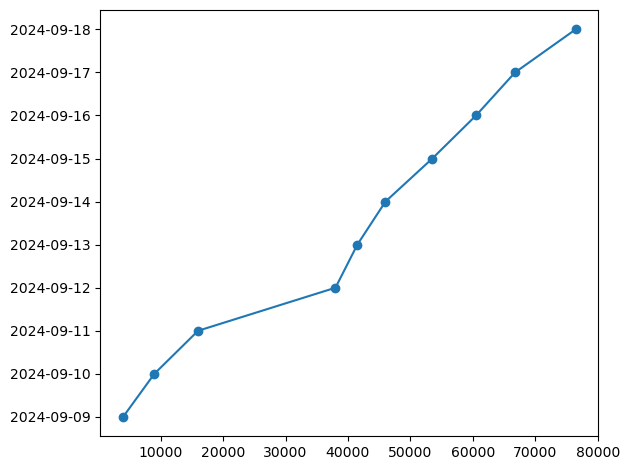

In [25]:
# Use the plot() function to plot the 'Sale Date' column versus the 'Total Sales' column

plt.plot(car_sales['Total Sales'],car_sales['Sale Date'],marker = 'o')

plt.tight_layout()

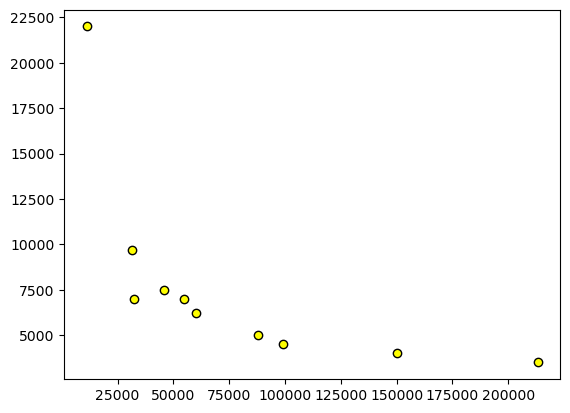

In [26]:
# Convert the 'Price' column to the integers
car_sales['Price'] = pd.to_numeric(car_sales['Price'], errors='coerce')

# Create a scatter plot of the 'Odometer (KM)' and 'Price' column using the plot() function
plt.scatter(car_sales['Odometer (KM)'], car_sales['Price'] , color='yellow', marker='o', edgecolor='black')

<BarContainer object of 4 artists>

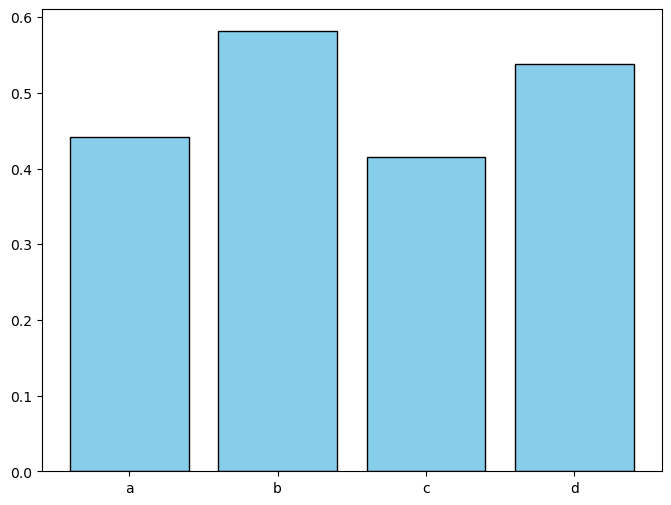

In [27]:
# Create a NumPy array of random numbers of size (10, 4) and save it to X
X = np.random.rand(10, 4) # We didn't study NumPy so I wrote this line but it's just an array

# Turn the NumPy array X into a DataFrame with columns called ['a', 'b', 'c', 'd']
df = pd.DataFrame(X, columns=['a', 'b', 'c', 'd'])
# Create a bar graph of the DataFrame

means = df.mean()
plt.figure(figsize=(8, 6))
plt.bar(means.index, means.values, color='skyblue', edgecolor='black')


<BarContainer object of 10 artists>

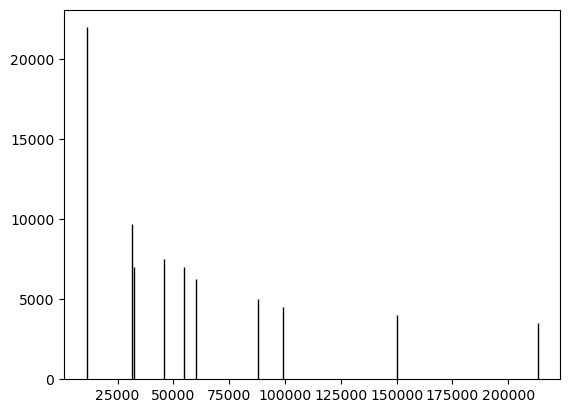

In [28]:
# Create a bar graph of the 'Make' and 'Odometer (KM)' columns in the car_sales DataFrame
plt.bar(car_sales['Odometer (KM)'], car_sales['Price'] , color='blue', width = 5 ,edgecolor='black')

(array([1., 3., 2., 1., 1., 0., 1., 0., 0., 1.]),
 array([ 11179. ,  31370.6,  51562.2,  71753.8,  91945.4, 112137. ,
        132328.6, 152520.2, 172711.8, 192903.4, 213095. ]),
 <BarContainer object of 10 artists>)

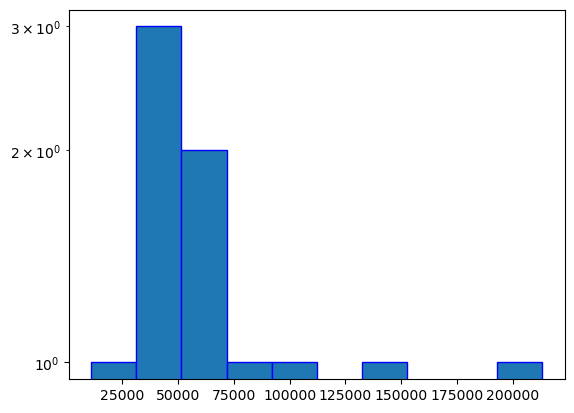

In [29]:
# Create a histogram of the 'Odometer (KM)' column
plt.hist(car_sales['Odometer (KM)'], log = True , edgecolor = 'blue')

(array([2., 2., 1., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 3500.,  4425.,  5350.,  6275.,  7200.,  8125.,  9050.,  9975.,
        10900., 11825., 12750., 13675., 14600., 15525., 16450., 17375.,
        18300., 19225., 20150., 21075., 22000.]),
 <BarContainer object of 20 artists>)

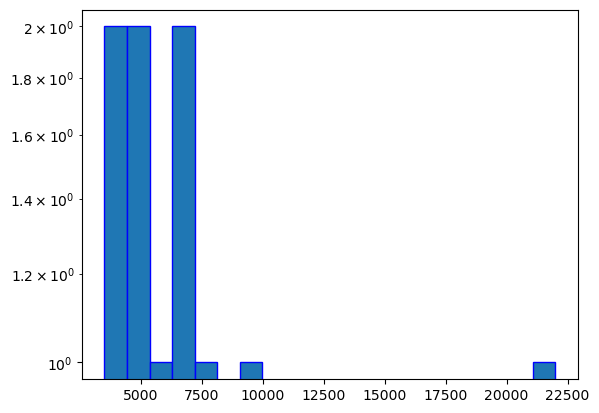

In [30]:
# Create a histogram of the 'Price' column with 20 bins
plt.hist(car_sales['Price']  , 20 , log = True , edgecolor = 'blue')

Now we've seen a few examples of plotting directly from DataFrames using the `car_sales` dataset.

Let's try using a different dataset.

In [32]:
# Import "../data/heart-disease.csv" and save it to the variable "heart_disease"
heart_disease = pd.read_csv('heart-disease.csv')


In [33]:
# View the first 10 rows of the heart_disease DataFrame
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


(array([ 1.,  0.,  0.,  0.,  0.,  2.,  4.,  0.,  2.,  3.,  4.,  3., 10.,
         8.,  8., 11.,  8.,  7.,  5.,  7.,  5.,  7., 12., 13.,  0.,  8.,
        16.,  8., 11., 17., 19., 14., 11.,  8., 11.,  9., 10.,  8.,  7.,
         9.,  4.,  3.,  4.,  3.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([29.  , 29.96, 30.92, 31.88, 32.84, 33.8 , 34.76, 35.72, 36.68,
        37.64, 38.6 , 39.56, 40.52, 41.48, 42.44, 43.4 , 44.36, 45.32,
        46.28, 47.24, 48.2 , 49.16, 50.12, 51.08, 52.04, 53.  , 53.96,
        54.92, 55.88, 56.84, 57.8 , 58.76, 59.72, 60.68, 61.64, 62.6 ,
        63.56, 64.52, 65.48, 66.44, 67.4 , 68.36, 69.32, 70.28, 71.24,
        72.2 , 73.16, 74.12, 75.08, 76.04, 77.  ]),
 <BarContainer object of 50 artists>)

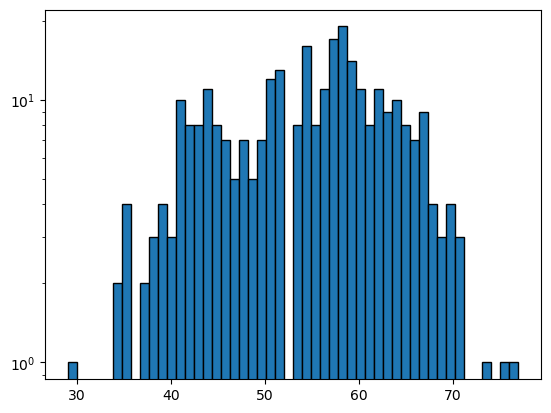

In [34]:
# Create a histogram of the "age" column with 50 bins
ages = heart_disease['age']
plt.hist(ages, 50 , edgecolor = 'black' , log = True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

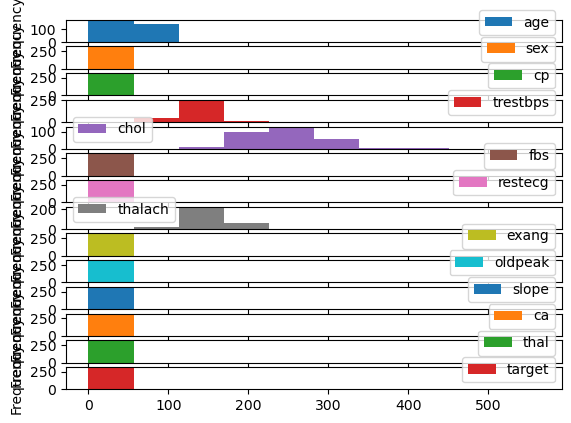

In [35]:
# Call plot.hist() on the heart_disease DataFrame and toggle the
# "subplots" parameter to True
heart_disease.plot.hist(subplots=True)

That plot looks pretty squished. Let's change the figsize.

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

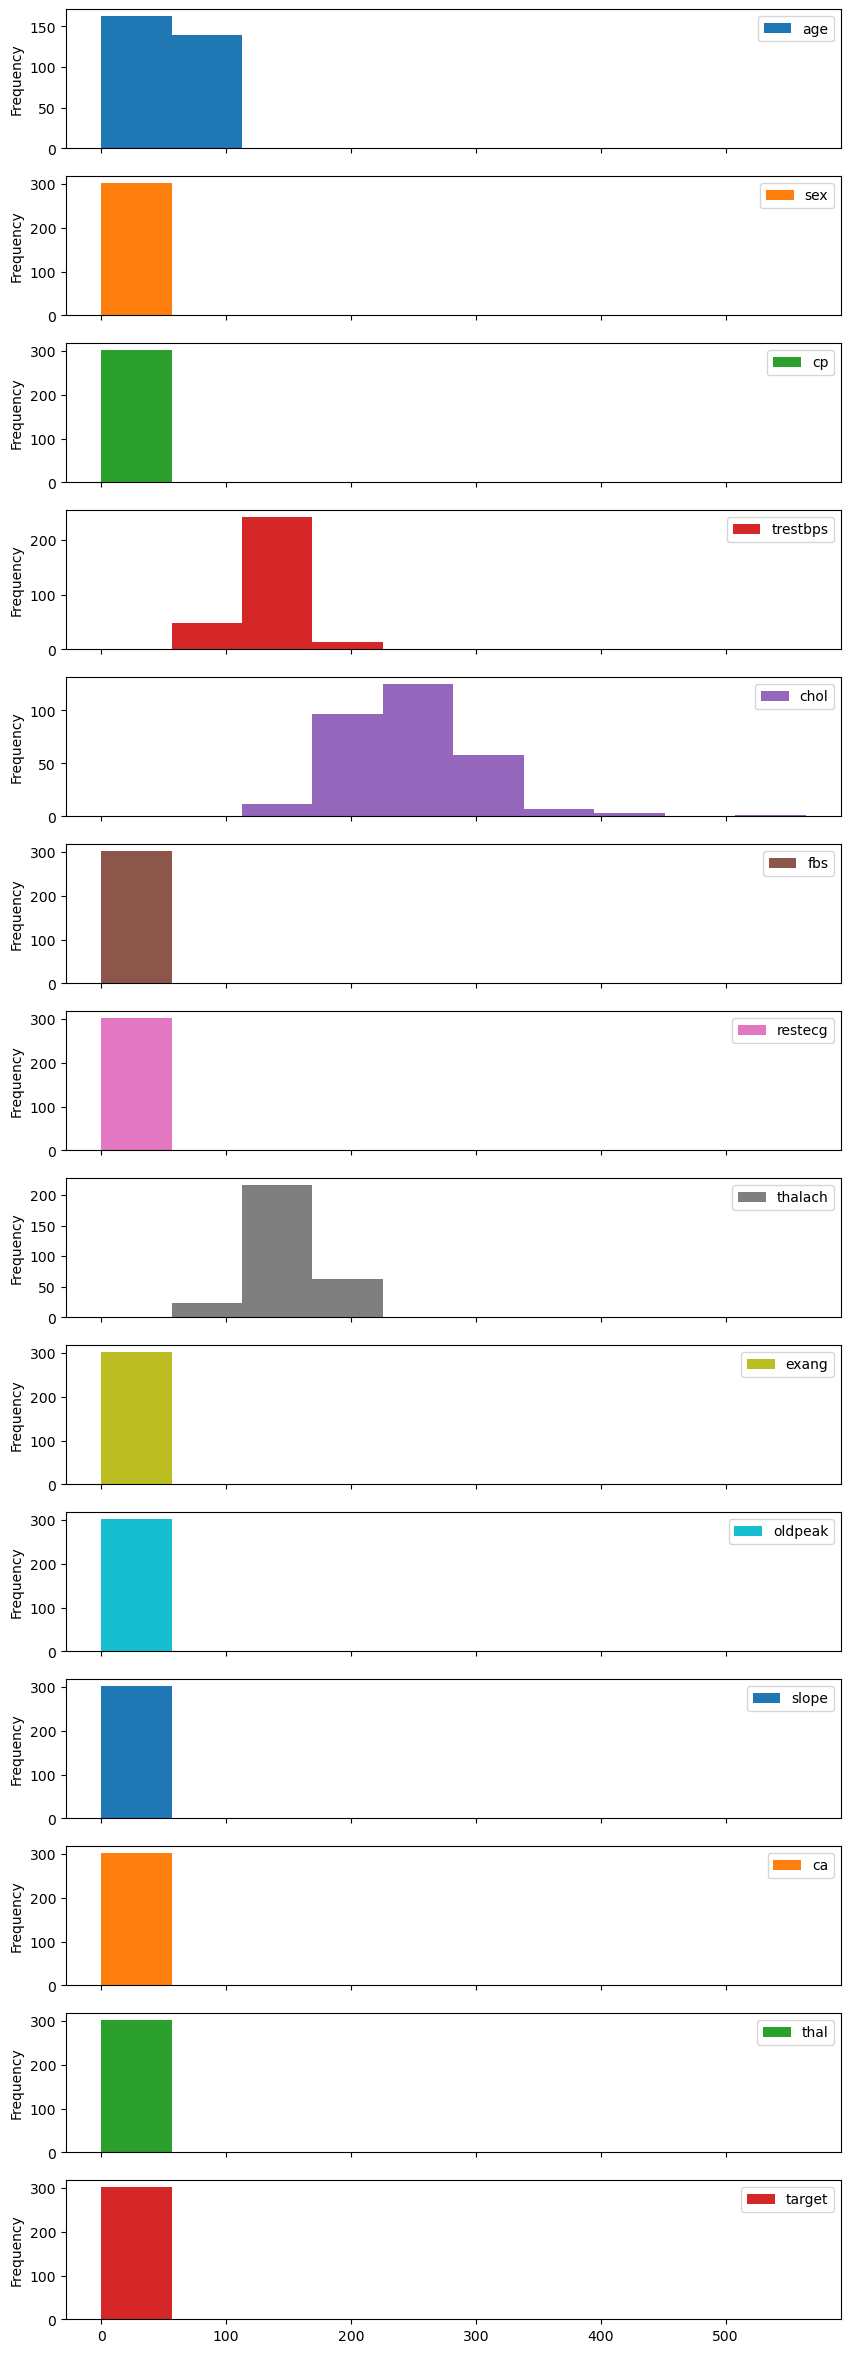

In [37]:
# Call the same line of code from above except change the "figsize" parameter
# to be (10, 30)
heart_disease.plot.hist(subplots=True, figsize=(10,30) )

Now let's try comparing two variables versus the target variable.

More specifially we'll see how age and cholesterol combined effect the target in **patients over 50 years old**.

For this next challenge, we're going to be replicating the following plot:

<img src="../images/matplotlib-heart-disease-chol-age-plot.png"/>

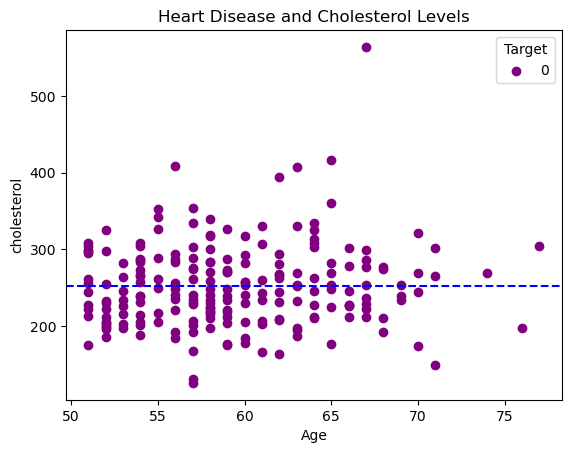

In [39]:
# Replicate the above plot in whichever way you see fit

# Note: The method below is only one way of doing it, yours might be
# slightly different

# Create DataFrame with patients over 50 years old
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.columns
# Create the plot
above_50 = heart_disease[heart_disease['age'] > 50]
plt.scatter( above_50['age'] , above_50['chol'] , color='purple', marker='o', edgecolor='purple',label = '0')
# Plot the data

# Customize the plot
plt.xlabel('Age')
plt.ylabel('cholesterol')
plt.title('Heart Disease and Cholesterol Levels')
plt.legend(title='Target', loc='upper right')

# Add a meanline
mean_chol = above_50['chol'].mean()
plt.axhline(y=mean_chol, color='blue', linestyle='--', label='Mean Cholesterol')

Beatiful, now you've created a plot of two different variables, let's change the style.

In [42]:
# Check what styles are available under plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [44]:
# Change the style to use "seaborn-whitegrid"
plt.style.use('seaborn-v0_8-whitegrid')

Now the style has been changed, we'll replot the same figure from above and see what it looks like.

If you've changed the style correctly, it should look like the following:
<img src="../images/matplotlib-heart-disease-chol-age-plot-seaborn-whitegrid.png"/>


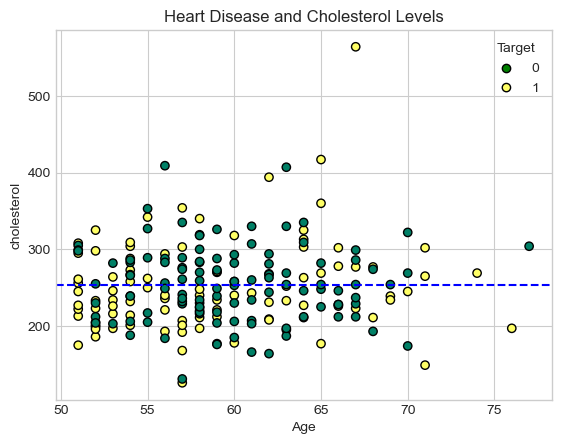

In [47]:
# Replicate the above plot in whichever way you see fit

# Note: The method below is only one way of doing it, yours might be
# slightly different
# Create the plot
above_50 = heart_disease[heart_disease['age'] > 50]
plt.scatter([], [], c='green', label='0', edgecolor='black')  
scatter = plt.scatter(
    above_50['age'], 
    above_50['chol'], 
    c=above_50['target'],
    cmap='summer',
    edgecolor='black', 
    label='1'
)
# Plot the data
plt.style.use('seaborn-v0_8-whitegrid')
# Customize the plot
plt.xlabel('Age')
plt.ylabel('cholesterol')
plt.title('Heart Disease and Cholesterol Levels')

plt.legend(title = 'Target')

# Add a meanline
mean_chol = above_50['chol'].mean()
plt.axhline(y=mean_chol, color='blue', linestyle='--', label='Mean Cholesterol')


Wonderful, you've changed the style of the plots and the figure is looking different but the dots aren't a very good colour.

Let's change the `cmap` parameter of `scatter()` as well as the `color` parameter of `axhline()` to fix it.

Completing this step correctly should result in a figure which looks like this:
<img src="../images/matplotlib-heart-disease-chol-age-plot-cmap-change.png"/>

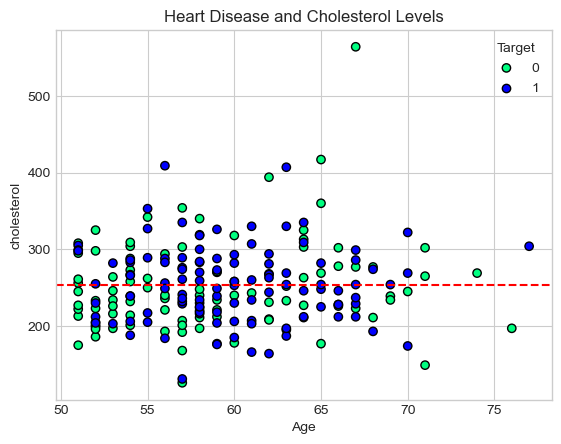

In [79]:
# Replot the same figure as above except change the "cmap" parameter
# of scatter() to "winter"
# Also change the "color" parameter of axhline() to "red"

# Create the plot
above_50 = heart_disease[heart_disease['age'] > 50]
scatter = plt.scatter(
    above_50['age'], 
    above_50['chol'], 
    c=above_50['target'],
    cmap='winter',
    edgecolor='black',  
    label='0'
)
# Plot the data
plt.style.use('seaborn-v0_8-whitegrid')
# Customize the plot
plt.xlabel('Age')
plt.ylabel('cholesterol')
plt.title('Heart Disease and Cholesterol Levels')

plt.scatter([], [], c='blue', label='1', edgecolor='black')  # Winter cmap starts with blue
plt.legend(title = 'Target')

# Add a meanline
mean_chol = above_50['chol'].mean()
plt.axhline(y=mean_chol, color='red', linestyle='--', label='Mean Cholesterol')
plt.savefig('fig.png')

Beautiful! Now our figure has an upgraded color scheme let's save it to file.

In [81]:
# Save the current figure using savefig(), the file name can be anything you want

# done in the previous step


(<Figure size 640x480 with 1 Axes>, <Axes: >)

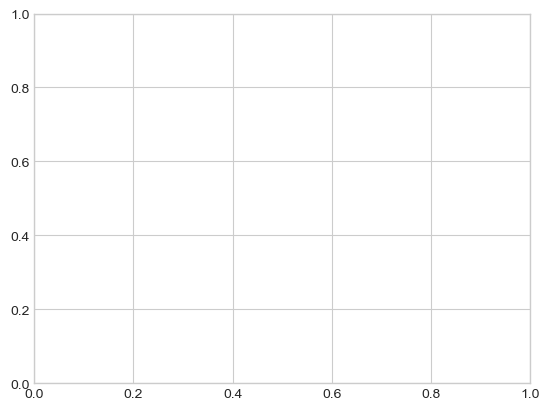

In [85]:
# Reset the figure by calling plt.subplots()
plt.subplots()  

## Extensions

For more exercises, check out the [Matplotlib tutorials page](https://matplotlib.org/3.1.1/tutorials/index.html). A good practice would be to read through it and for the parts you find interesting, add them into the end of this notebook.

The next place you could go is the [Stack Overflow page for the top questions and answers for Matplotlib](https://stackoverflow.com/questions/tagged/matplotlib?sort=MostVotes&edited=true). Often, you'll find some of the most common and useful Matplotlib functions here. Don't forget to play around with the Stack Overflow filters! You'll likely find something helpful here.

Finally, as always, remember, the best way to learn something new is to try it. And try it relentlessly. Always be asking yourself, "is there a better way this data could be visualized so it's easier to understand?"